This is a notebook to calculate the real return.

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
REAL_RETURN_PATH = '~/OneDrive - connect.hku.hk/Algo_trading/first_round_test_market_data.csv'

In [3]:
test_market = pd.read_csv(REAL_RETURN_PATH)

In [4]:
test_market_1 = test_market['date_time'].str.split('p', expand=True)

In [5]:
test_market_1.columns = ['date', 'time']

In [6]:
test_market = pd.concat([test_market, test_market_1], axis=1)
test_market

,date_time,open,close,high,low,volume,money,date,time
0,s0d1001p1,12.1016,12.1380,12.2108,12.1016,481660.0,5.852130e+06,s0d1001,1
1,s1d1001p1,29.6289,29.9444,30.1387,29.6167,44668.0,1.339230e+06,s1d1001,1
2,s2d1001p1,23.2443,22.9408,23.2443,22.9287,68436.0,1.574255e+06,s2d1001,1
3,s3d1001p1,8.6180,8.6908,8.7636,8.6180,52373.0,4.576317e+05,s3d1001,1
4,s4d1001p1,8.5694,8.6423,8.6908,8.5694,1099828.0,9.481696e+06,s4d1001,1
...,...,...,...,...,...,...,...,...,...
1889995,s49d1700p50,27.6868,27.6868,27.6868,27.6868,329087.0,9.110941e+06,s49d1700,50
1889996,s50d1700p50,28.9370,28.9127,28.9370,28.9127,59517.0,1.720829e+06,s50d1700,50
1889997,s51d1700p50,9.9896,9.9896,9.9896,9.9896,87100.0,8.700919e+05,s51d1700,50
1889998,s52d1700p50,71.9055,71.9662,71.9662,71.9055,126493.0,9.103476e+06,s52d1700,50


In [7]:
test_market = test_market[test_market['time'] == '50']

In [8]:
new_index = np.arange(1, 37801)
test_market.index = new_index

In [9]:
first_day_close = test_market[:-108]
third_day_close = test_market[108:]

In [10]:
first_day_close.index = np.arange(1, 37693)
third_day_close.index = np.arange(1, 37693)

In [11]:
two_day_return = third_day_close['close'] - first_day_close['close']

In [12]:
# Save real return
first_day_close['return'] = two_day_return

real_return = first_day_close[['date','return']]
real_return.columns=['date_time','return']
#real_return.to_csv('real_return.csv',index = False)

/var/folders/f9/wvq_xc_55qz6_bs1fpfvhtr80000gp/T/ipykernel_10584/1556123552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_day_close['return'] = two_day_return


In [13]:
real_return

,date_time,return
1,s0d1001,0.2549
2,s1d1001,-0.2184
3,s2d1001,0.4126
4,s3d1001,0.2670
5,s4d1001,0.4491
...,...,...
37688,s49d1698,0.1700
37689,s50d1698,0.0485
37690,s51d1698,-0.0971
37691,s52d1698,1.2017


Analysis the features of real return

In [14]:
real_return.describe()

,return
count,37692.000000
mean,0.174679
std,7.994733
min,-227.114100
25%,-0.388400
50%,0.012100
75%,0.461200
max,279.222500


<AxesSubplot:ylabel='Density'>

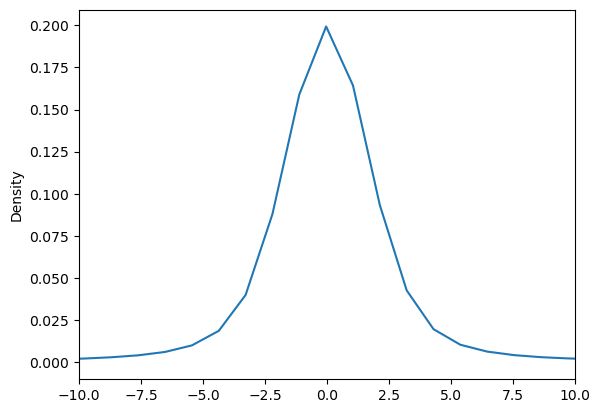

In [27]:
real_return['return'].diff().plot.kde(xlim=(-10,10))

Analysis my prediction

In [15]:
my_prediction = pd.read_csv('~/OneDrive - connect.hku.hk/Algo_trading/submission/submission_4.csv')

In [17]:
my_prediction.describe()

,return
count,37800.000000
mean,0.023568
std,0.020664
min,-0.085097
25%,0.010300
50%,0.027303
75%,0.036753
max,0.299068


<AxesSubplot:ylabel='Density'>

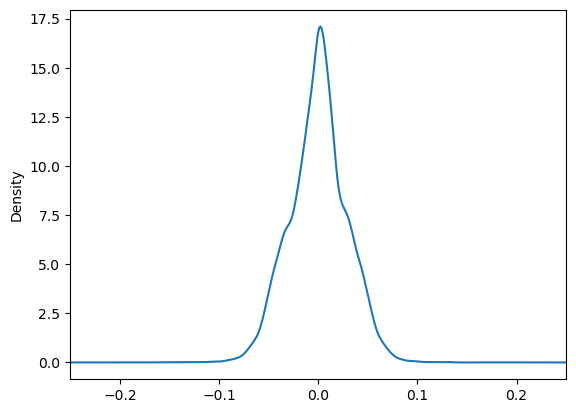

In [31]:
my_prediction['return'].diff().plot.kde(xlim=(-0.25,0.25))

Fix my prediction

In [47]:
my_prediction_1 = my_prediction['return']*80

In [48]:
my_prediction_1 = pd.concat([my_prediction['date_time'], my_prediction_1], axis=1)

<AxesSubplot:ylabel='Density'>

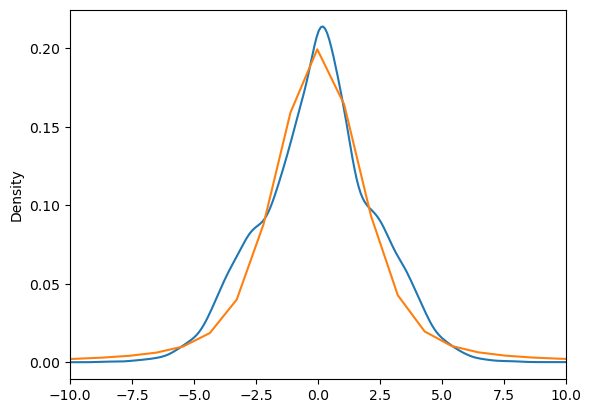

In [50]:
my_prediction_1['return'].diff().plot.kde(xlim=(-10,10))
real_return['return'].diff().plot.kde(xlim=(-10,10))

In [53]:
my_prediction_1.describe()

,return
count,37800.000000
mean,1.885423
std,1.653131
min,-6.807731
25%,0.824029
50%,2.184273
75%,2.940262
max,23.925458


In [52]:
my_prediction_1.to_csv('submission.csv',index = False)

<AxesSubplot:ylabel='Density'>

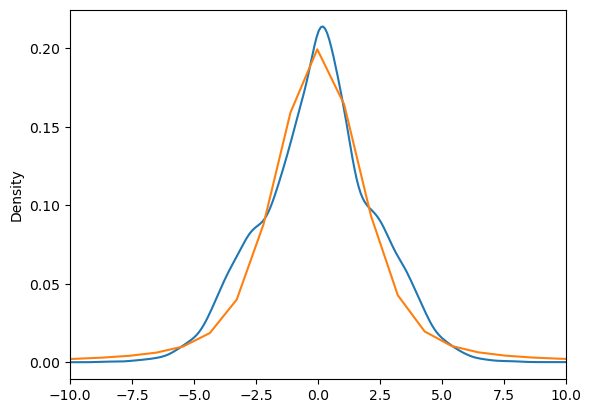

In [58]:
my_prediction_2 = my_prediction_1['return']-2
my_prediction_2 = pd.concat([my_prediction['date_time'], my_prediction_2], axis=1)
my_prediction_2['return'].diff().plot.kde(xlim=(-10,10))
real_return['return'].diff().plot.kde(xlim=(-10,10))

In [59]:
my_prediction_2

,date_time,return
0,s0d1001,0.019240
1,s1d1001,1.811434
2,s2d1001,0.867941
3,s3d1001,1.063187
4,s4d1001,-1.511132
...,...,...
37795,s49d1700,-2.601280
37796,s50d1700,0.130039
37797,s51d1700,0.734715
37798,s52d1700,-2.063065


In [42]:
time = third_day_close[-108:]
time = time['date']
time.index = np.arange(0, 108)

In [43]:
return_df = pd.DataFrame(np.random.randn(108, 1))
return_df.columns = ['return']
return_df['date_time'] = time
return_df = pd.concat([return_df['date_time'], return_df['return']], axis=1)

In [44]:
return_df

,date_time,return
0,s0d1699,-0.671838
1,s1d1699,-0.419392
2,s2d1699,-0.613705
3,s3d1699,-0.407974
4,s4d1699,-0.874823
...,...,...
103,s49d1700,-0.553872
104,s50d1700,-0.256926
105,s51d1700,-1.429398
106,s52d1700,-0.468530


In [45]:
submission = pd.concat([real_return, return_df], axis=0)
submission

,date_time,return
1,s0d1001,0.254900
2,s1d1001,-0.218400
3,s2d1001,0.412600
4,s3d1001,0.267000
5,s4d1001,0.449100
...,...,...
103,s49d1700,-0.553872
104,s50d1700,-0.256926
105,s51d1700,-1.429398
106,s52d1700,-0.468530


In [46]:
#submission.to_csv('submission.csv',index = False)